In [106]:
import numpy as np
import pandas as pd
import json
import sqlalchemy as sa
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
df= pd.read_csv(r"C:\Users\srira\Downloads\archive\pokemon.csv")
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [4]:
df.head(150)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1
146,"['Shed Skin', 'Marvel Scale']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,...,50.0,147,50,50,50,dragon,NaN,3.3,1,0
147,"['Shed Skin', 'Marvel Scale']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,...,50.0,148,70,70,70,dragon,NaN,16.5,1,0
148,"['Inner Focus', 'Multiscale']",0.50,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,50.0,149,100,100,80,dragon,flying,210.0,1,0


In [5]:
df2 = pd.read_json(r"C:\Users\srira\Downloads\pokedex.json")
df2

,pokemon
0,"{'id': 1, 'num': '001', 'name': 'Bulbasaur', '..."
1,"{'id': 2, 'num': '002', 'name': 'Ivysaur', 'im..."
2,"{'id': 3, 'num': '003', 'name': 'Venusaur', 'i..."
3,"{'id': 4, 'num': '004', 'name': 'Charmander', ..."
4,"{'id': 5, 'num': '005', 'name': 'Charmeleon', ..."
...,...
146,"{'id': 147, 'num': '147', 'name': 'Dratini', '..."
147,"{'id': 148, 'num': '148', 'name': 'Dragonair',..."
148,"{'id': 149, 'num': '149', 'name': 'Dragonite',..."
149,"{'id': 150, 'num': '150', 'name': 'Mewtwo', 'i..."


In [6]:
try:
    pokeDexJsonStr = open(r"C:\Users\srira\Downloads\pokedex.json")
except(FileNotFoundError):
    print("please check if the file name is correct or if the file exists in first place")
else:
    pokeDexJson = json.load(pokeDexJsonStr)
    print(type(pokeDexJson))

<class 'dict'>


In [7]:
import pprint
from pprint import pprint
pprint(pokeDexJson)

{'pokemon': [{'avg_spawns': 69,
              'candy': 'Bulbasaur Candy',
              'candy_count': 25,
              'egg': '2 km',
              'height': '0.71 m',
              'id': 1,
              'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
              'multipliers': [1.58],
              'name': 'Bulbasaur',
              'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
                                 {'name': 'Venusaur', 'num': '003'}],
              'num': '001',
              'spawn_chance': 0.69,
              'spawn_time': '20:00',
              'type': ['Grass', 'Poison'],
              'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
              'weight': '6.9 kg'},
             {'avg_spawns': 4.2,
              'candy': 'Bulbasaur Candy',
              'candy_count': 100,
              'egg': 'Not in Eggs',
              'height': '0.99 m',
              'id': 2,
              'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
    

In [8]:
pokeDex = pd.json_normalize(pokeDexJson,record_path = ["pokemon"])
pokeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


In [9]:
def expandListElements(l):
    s = ' '
    for ele in l:
        s+=''   +ele
    s = s.lstrip()
    return s

In [10]:

(lambda x: ' '.join(x))(['abc','def'])

'abc def'

In [11]:
expandListElements(['abc','def']).split()

['abcdef']

In [12]:
dfType =pokeDex['type'].apply(lambda x: ' '.join(x)).str.split( expand = True)
dfType.columns = ['type_'+str(ele + 1)for ele in dfType.columns]

dfWeaknesses =pokeDex['weaknesses'].apply(lambda x: ' '.join(x)).str.split(expand = True)
dfWeaknesses.columns = ['weaknesses'+ str(ele + 1)for ele in dfWeaknesses.columns]


In [13]:
poKeDex = pd.concat([pokeDex,dfType,dfWeaknesses],axis = 1)
poKeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,prev_evolution,type_1,type_2,weaknesses1,weaknesses2,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,NaN,Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,"[{'num': '001', 'name': 'Bulbasaur'}]",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,NaN,Fire,None,Water,Ground,Rock,None,None,None,None
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,"[{'num': '004', 'name': 'Charmander'}]",Fire,None,Water,Ground,Rock,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,NaN,Dragon,None,Ice,Dragon,Fairy,None,None,None,None
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,"[{'num': '147', 'name': 'Dratini'}]",Dragon,None,Ice,Dragon,Fairy,None,None,None,None
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",Dragon,Flying,Ice,Rock,Dragon,Fairy,None,None,None
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,NaN,Psychic,None,Bug,Ghost,Dark,None,None,None,None


In [14]:
 poKeDex.drop(columns = ['type','weaknesses'],inplace = True)
poKeDex

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,prev_evolution,type_1,type_2,weaknesses1,weaknesses2,weaknesses3,weaknesses4,weaknesses5,weaknesses6,weaknesses7
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,NaN,Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,"[{'num': '001', 'name': 'Bulbasaur'}]",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,...,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",Grass,Poison,Fire,Ice,Flying,Psychic,None,None,None
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,NaN,Fire,None,Water,Ground,Rock,None,None,None,None
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,"[{'num': '004', 'name': 'Charmander'}]",Fire,None,Water,Ground,Rock,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,NaN,Dragon,None,Ice,Dragon,Fairy,None,None,None,None
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,"[{'num': '147', 'name': 'Dratini'}]",Dragon,None,Ice,Dragon,Fairy,None,None,None,None
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,...,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",Dragon,Flying,Ice,Rock,Dragon,Fairy,None,None,None
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,...,NaN,Psychic,None,Bug,Ghost,Dark,None,None,None,None


In [15]:
poKeDex.columns

Index(['id', 'num', 'name', 'img', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'next_evolution', 'prev_evolution', 'type_1', 'type_2', 'weaknesses1',
       'weaknesses2', 'weaknesses3', 'weaknesses4', 'weaknesses5',
       'weaknesses6', 'weaknesses7'],
      dtype='object')

In [16]:
poKeDex[[ 'next_evolution','prev_evolution']]

,next_evolution,prev_evolution
0,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...
146,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,NaN,NaN


In [17]:
def foo(l):
    try:
        iterator = iter(l)
    except TypeError:
        return None
    else:
        return [ele['num'] for ele in l]
        

In [18]:

dfNextEvolution = pokeDex['next_evolution'].apply(lambda x: foo(x)).apply(pd.Series)
dfprevEvolution = pokeDex['prev_evolution'].apply(lambda x :foo(x)).apply(pd.Series)

In [19]:
dfNextEvolution.columns = [str(ele+1)+'st_Evolution' for ele in dfNextEvolution.columns]
dfprevEvolution.columns = [str(ele+1)+'st_preEvolution' for ele in dfprevEvolution.columns[::-1]]

In [20]:
dfprevEvolution

,2st_preEvolution,1st_preEvolution
0,NaN,NaN
1,001,NaN
2,001,002
3,NaN,NaN
4,004,NaN
...,...,...
146,NaN,NaN
147,147,NaN
148,147,148
149,NaN,NaN


In [21]:
dfprevEvolution[['1st_preEvolution','2st_preEvolution']]

,1st_preEvolution,2st_preEvolution
0,NaN,NaN
1,NaN,001
2,002,001
3,NaN,NaN
4,NaN,004
...,...,...
146,NaN,NaN
147,NaN,147
148,148,147
149,NaN,NaN


In [22]:
dfNextEvolution

,1st_Evolution,2st_Evolution,3st_Evolution
0,002,003,NaN
1,003,NaN,NaN
2,NaN,NaN,NaN
3,005,006,NaN
4,006,NaN,NaN
...,...,...,...
146,148,149,NaN
147,149,NaN,NaN
148,NaN,NaN,NaN
149,NaN,NaN,NaN


In [23]:
pokeDex = pd.concat([pokeDex,dfNextEvolution,dfprevEvolution],axis = 1 )
pokeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,1st_Evolution,2st_Evolution,3st_Evolution,2st_preEvolution,1st_preEvolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,002,003,NaN,NaN,NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",003,NaN,NaN,001,NaN
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",NaN,NaN,NaN,001,002
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,005,006,NaN,NaN,NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",006,NaN,NaN,004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,148,149,NaN,NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",149,NaN,NaN,147,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",NaN,NaN,NaN,147,148
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pokeDex['spawn_chance'].value_counts()

spawn_chance
0.0000    6
0.0120    5
0.0220    4
0.0170    4
0.0200    4
         ..
0.0097    1
0.0640    1
6.5200    1
0.3900    1
0.0011    1
Name: count, Length: 104, dtype: int64

In [25]:
df4 = pd.merge(pokeDex,df,on='name',how = 'right')

In [26]:
df4

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,5.0,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,NaN,NaN,Celesteela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,NaN,NaN,Kartana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,NaN,NaN,Guzzlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,NaN,NaN,Necrozma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [27]:
df4['num'] = pd.to_numeric(df4['num'], errors='coerce')
merged = df4[df4['num'] <= 151]

In [28]:
merged

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,NaN,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,NaN,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [29]:
merged.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       '1st_Evolution', '2st_Evolution', '3st_Evolution', '2st_preEvolution',
       '1st_preEvolution', 'abilities', 'against_bug', 'against_dark',
       'against_dragon', 'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal', 'against_poison',
       'against_psychic', 'against_rock', 'against_steel', 'against_water',
       'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']

In [30]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 150
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 149 non-null    float64
 1   num                149 non-null    float64
 2   name               149 non-null    object 
 3   img                149 non-null    object 
 4   type               149 non-null    object 
 5   height             149 non-null    object 
 6   weight             149 non-null    object 
 7   candy              149 non-null    object 
 8   candy_count        68 non-null     float64
 9   egg                149 non-null    object 
 10  spawn_chance       149 non-null    float64
 11  avg_spawns         149 non-null    float64
 12  spawn_time         149 non-null    object 
 13  multipliers        68 non-null     object 
 14  weaknesses         149 non-null    object 
 15  next_evolution     68 non-null     object 
 16  prev_evolution     72 non-null 

In [31]:
merged.describe()


,id,num,candy_count,spawn_chance,avg_spawns,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,149.000000,149.000000,68.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,131.000000,149.000000,136.000000,149.000000,149.000000,149.000000,149.000000,131.000000,149.0,149.000000
mean,76.610738,76.610738,58.250000,0.723757,52.911966,0.911074,1.067114,0.979866,1.161074,0.922819,...,1.253435,64.530201,56.069853,76.610738,69.798658,68.114094,70.483221,46.405344,1.0,0.033557
std,43.705048,43.705048,49.297869,1.968239,111.506550,0.573981,0.351914,0.238798,0.698136,0.379922,...,1.007991,28.735644,20.708289,43.705048,33.504130,25.947330,29.219718,58.319913,0.0,0.180693
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.500000,...,0.300000,10.000000,0.000000,1.000000,10.000000,20.000000,15.000000,0.100000,1.0,0.000000
25%,40.000000,40.000000,50.000000,0.015000,1.400000,0.500000,1.000000,1.000000,0.500000,0.500000,...,0.800000,45.000000,50.000000,40.000000,45.000000,50.000000,45.000000,9.950000,1.0,0.000000
50%,77.000000,77.000000,50.000000,0.074000,7.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.100000,60.000000,50.000000,77.000000,65.000000,70.000000,70.000000,30.000000,1.0,0.000000
75%,114.000000,114.000000,50.000000,0.580000,52.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.500000,80.000000,56.350000,114.000000,90.000000,85.000000,90.000000,59.500000,1.0,0.000000
max,151.000000,151.000000,400.000000,15.980000,712.000000,4.000000,2.000000,2.000000,4.000000,2.000000,...,8.800000,250.000000,100.000000,151.000000,194.000000,130.000000,150.000000,460.000000,1.0,1.000000


In [32]:
ds = df['against_bug'].value_counts()
ds

against_bug
1.00    376
0.50    247
2.00    128
0.25     42
4.00      8
Name: count, dtype: int64

In [33]:
sd = merged.isnull().sum()
sd

id               0
num              0
name             0
img              0
type             0
                ..
type1            0
type2           68
weight_kg       18
generation       0
is_legendary     0
Length: 62, dtype: int64

In [34]:
df3 = merged.fillna(0)

In [35]:
df3

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,0,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,0,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,0,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,0,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,0.0,150,194,120,140,psychic,0,122.0,1,1


In [36]:
df3

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,0,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,0,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,0,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,0,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,0.0,150,194,120,140,psychic,0,122.0,1,1


In [37]:
print(df3.columns)

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       '1st_Evolution', '2st_Evolution', '3st_Evolution', '2st_preEvolution',
       '1st_preEvolution', 'abilities', 'against_bug', 'against_dark',
       'against_dragon', 'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal', 'against_poison',
       'against_psychic', 'against_rock', 'against_steel', 'against_water',
       'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']

In [38]:
group1 = df.groupby('type1')['attack'].mean()
print(group1)



type1
bug          70.125000
dark         87.793103
dragon      106.407407
electric     70.820513
fairy        62.111111
fighting     99.178571
fire         81.500000
flying       66.666667
ghost        72.740741
grass        73.769231
ground       94.812500
ice          73.304348
normal       75.161905
poison       72.656250
psychic      65.566038
rock         90.666667
steel        93.083333
water        73.307018
Name: attack, dtype: float64


In [39]:
group2 = df.groupby('abilities')['base_total']
print(group2)


In [40]:
group3 = df.groupby('against_bug')['base_total'].sum()
print(group3)

against_bug
0.25     19931
0.50    106084
1.00    158156
2.00     55439
4.00      3520
Name: base_total, dtype: int64


In [41]:

df3.rename(columns={'abilities': 'powers'}, inplace=True)


In [42]:
df3.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,0,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,0,19.0,1,0


In [43]:
df3.tail()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,0,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,0,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,0.0,150,194,120,140,psychic,0,122.0,1,1
150,151.0,151.0,Mew,http://www.serebii.net/pokemongo/pokemon/151.png,[Psychic],0.41 m,4.0 kg,None,0.0,Not in Eggs,...,0.0,151,100,100,100,psychic,0,4.0,1,1


In [44]:
ml = df3['against_dark'].mean()
ml

1.0671140939597314

<BarContainer object of 1 artists>

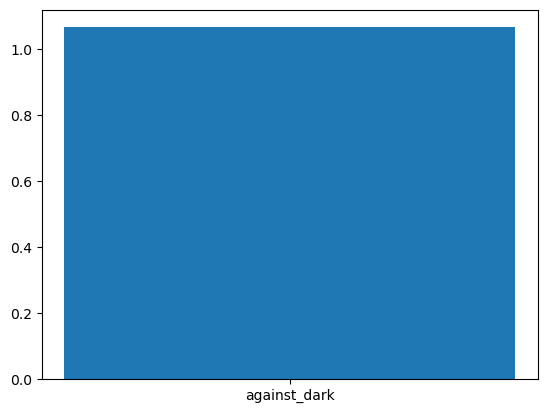

In [45]:
plt.bar(['against_dark'], [ml])

In [46]:
 df3['against_dark'].median()

1.0

In [47]:
lk =df3['against_dark'].mode()

In [48]:

firstrow = df3.iloc[0]

columns= df3.iloc[:3, :5]


In [49]:
firstrow


id                                                           1.0
num                                                          1.0
name                                                   Bulbasaur
img             http://www.serebii.net/pokemongo/pokemon/001.png
type                                             [Grass, Poison]
                                      ...                       
type1                                                      grass
type2                                                     poison
weight_kg                                                    6.9
generation                                                     1
is_legendary                                                   0
Name: 0, Length: 62, dtype: object

In [50]:
columns

,id,num,name,img,type
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]"
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]"
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]"


In [51]:
selectedloc = df3.loc[5, ['powers', 'against_dark', 'attack']].unique()
print(selectedloc)


["['Blaze', 'Solar Power']" 1.0 104]


<Axes: ylabel='Frequency'>

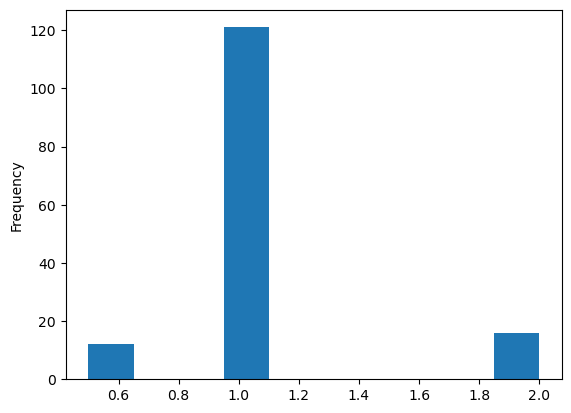

In [52]:
merged['against_dark'].plot(kind='hist')


In [53]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 150
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 149 non-null    float64
 1   num                149 non-null    float64
 2   name               149 non-null    object 
 3   img                149 non-null    object 
 4   type               149 non-null    object 
 5   height             149 non-null    object 
 6   weight             149 non-null    object 
 7   candy              149 non-null    object 
 8   candy_count        68 non-null     float64
 9   egg                149 non-null    object 
 10  spawn_chance       149 non-null    float64
 11  avg_spawns         149 non-null    float64
 12  spawn_time         149 non-null    object 
 13  multipliers        68 non-null     object 
 14  weaknesses         149 non-null    object 
 15  next_evolution     68 non-null     object 
 16  prev_evolution     72 non-null 

In [54]:
df4.isnull().sum()

id              652
num             652
name              0
img             652
type            652
               ... 
type1             0
type2           384
weight_kg        20
generation        0
is_legendary      0
Length: 62, dtype: int64

In [55]:
merged[merged['candy_count'].isnull()].head(150)

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,...,88.1,6,159,115,100,fire,flying,90.5,1,0
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,88.1,9,135,115,78,water,NaN,85.5,1,0
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,...,50.0,12,90,80,70,bug,flying,32.0,1,0
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,...,50.0,15,15,80,145,bug,poison,29.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,NaN,146,125,85,90,fire,flying,60.0,1,1
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [56]:
merged['candy_count'].fillna(0,inplace = True)

C:\Users\srira\AppData\Local\Temp\ipykernel_14280\2280211847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['candy_count'].fillna(0,inplace = True)


In [57]:
merged

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,NaN,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,NaN,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [58]:
merged.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       '1st_Evolution', '2st_Evolution', '3st_Evolution', '2st_preEvolution',
       '1st_preEvolution', 'abilities', 'against_bug', 'against_dark',
       'against_dragon', 'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal', 'against_poison',
       'against_psychic', 'against_rock', 'against_steel', 'against_water',
       'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']

In [59]:
merged[merged['multipliers'].isnull()]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,0.0,Not in Eggs,...,88.1,6,159,115,100,fire,flying,90.5,1,0
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,0.0,Not in Eggs,...,88.1,9,135,115,78,water,NaN,85.5,1,0
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,0.0,Not in Eggs,...,50.0,12,90,80,70,bug,flying,32.0,1,0
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,0.0,Not in Eggs,...,50.0,15,15,80,145,bug,poison,29.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,0.0,Not in Eggs,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,0.0,Not in Eggs,...,NaN,146,125,85,90,fire,flying,60.0,1,1
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [60]:
merged['multipliers'].fillna(value = 'None')

0            [1.58]
1        [1.2, 1.6]
2              None
3            [1.65]
4            [1.79]
           ...     
146    [1.83, 1.84]
147          [2.05]
148            None
149            None
150            None
Name: multipliers, Length: 149, dtype: object

In [61]:
merged.drop('type', axis=1)

,id,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,0.0170,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,50.0,147,50,50,50,dragon,NaN,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,50.0,148,70,70,70,dragon,NaN,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,0.0011,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,0.0,Not in Eggs,0.0000,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [62]:
merged[merged['type2'].isnull()]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
6,7.0,7.0,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,8.0,8.0,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,0.0,Not in Eggs,...,88.1,9,135,115,78,water,NaN,85.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,143.0,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,[Normal],2.11 m,460.0 kg,None,0.0,10 km,...,88.1,143,65,110,30,normal,NaN,460.0,1,0
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,NaN,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,NaN,16.5,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [63]:
merged['type2'].fillna(merged['type1'])

0       poison
1       poison
2       poison
3         fire
4         fire
        ...   
146     dragon
147     dragon
148     flying
149    psychic
150    psychic
Name: type2, Length: 149, dtype: object

In [64]:
merged['type2'].fillna(merged['type1'], inplace=True)

C:\Users\srira\AppData\Local\Temp\ipykernel_14280\3675918718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['type2'].fillna(merged['type1'], inplace=True)


In [65]:
merged

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,fire,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,dragon,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,dragon,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,NaN,150,194,120,140,psychic,psychic,122.0,1,1


In [66]:
merged[merged['weight_kg'].isnull()]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,19.0,19.0,Rattata,http://www.serebii.net/pokemongo/pokemon/019.png,[Normal],0.30 m,3.5 kg,Rattata Candy,25.0,2 km,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,20.0,20.0,Raticate,http://www.serebii.net/pokemongo/pokemon/020.png,[Normal],0.71 m,18.5 kg,Rattata Candy,0.0,Not in Eggs,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,26.0,26.0,Raichu,http://www.serebii.net/pokemongo/pokemon/026.png,[Electric],0.79 m,30.0 kg,Pikachu Candy,0.0,Not in Eggs,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,27.0,27.0,Sandshrew,http://www.serebii.net/pokemongo/pokemon/027.png,[Ground],0.61 m,12.0 kg,Sandshrew Candy,50.0,5 km,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,28.0,28.0,Sandslash,http://www.serebii.net/pokemongo/pokemon/028.png,[Ground],0.99 m,29.5 kg,Sandshrew Candy,0.0,Not in Eggs,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,37.0,37.0,Vulpix,http://www.serebii.net/pokemongo/pokemon/037.png,[Fire],0.61 m,9.9 kg,Vulpix Candy,50.0,5 km,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,38.0,38.0,Ninetales,http://www.serebii.net/pokemongo/pokemon/038.png,[Fire],1.09 m,19.9 kg,Vulpix Candy,0.0,Not in Eggs,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,50.0,50.0,Diglett,http://www.serebii.net/pokemongo/pokemon/050.png,[Ground],0.20 m,0.8 kg,Diglett Candy,50.0,5 km,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,51.0,51.0,Dugtrio,http://www.serebii.net/pokemongo/pokemon/051.png,[Ground],0.71 m,33.3 kg,Dugtrio,0.0,Not in Eggs,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,52.0,52.0,Meowth,http://www.serebii.net/pokemongo/pokemon/052.png,[Normal],0.41 m,4.2 kg,Meowth Candy,50.0,5 km,...,50.0,52,50,40,90,normal,dark,NaN,1,0


In [67]:
merged[['weight','weight_kg']]

,weight,weight_kg
0,6.9 kg,6.9
1,13.0 kg,13.0
2,100.0 kg,100.0
3,8.5 kg,8.5
4,19.0 kg,19.0
...,...,...
146,3.3 kg,3.3
147,16.5 kg,16.5
148,210.0 kg,210.0
149,122.0 kg,122.0


In [68]:
merged


,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,fire,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,dragon,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,dragon,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,NaN,150,194,120,140,psychic,psychic,122.0,1,1


In [69]:
missing_percentage_male_rows = merged[merged["percentage_male"].isna()]
unique_types = missing_percentage_male_rows["type1"].unique()
print("Unique Types with Missing 'percentage_male':", unique_types)


Unique Types with Missing 'percentage_male': ['electric' 'water' 'normal' 'ice' 'fire' 'psychic']


In [70]:
type_counts = merged['type1'].value_counts()

lt.plot(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title')
plt.show()

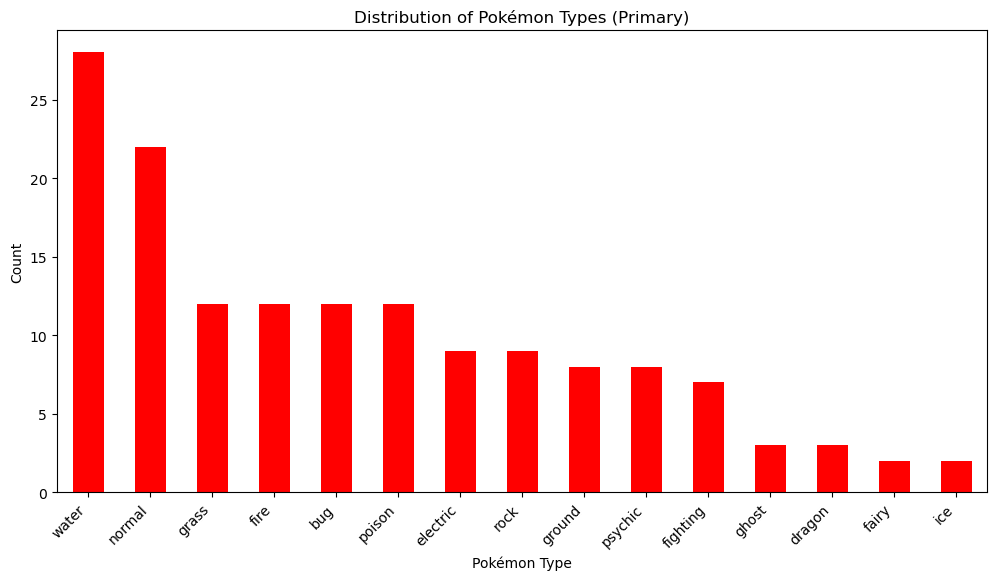

In [71]:
plt.figure(figsize=(12, 6)) # height 12 inchies # weight 6inchis
type_counts.plot(kind='bar', color='red')
plt.title('Distribution of Pokémon Types (Primary)')
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# plt.figure(figsize=(12, 6)): This line sets the size of the figure (the entire plotting area) to be 12 units wide and 6 units high. This is done to control the overall size of the plot.

# type_counts.plot(kind='bar', color='skyblue'): This line creates a bar plot using the plot method of the type_counts Series. The kind='bar' parameter specifies that we want to create a bar chart. The color='skyblue' parameter sets the color of the bars to sky blue.
# plt.title('Distribution of Pokémon Types (Primary)'): This line adds a title to the plot, specifying that it represents the distribution of Pokémon types, focusing on the primary types.
# plt.xlabel('Pokémon Type'): This line adds a label to the x-axis, indicating that the x-axis represents different Pokémon types.
# plt.ylabel('Count'): This line adds a label to the y-axis, indicating that the y-axis represents the count of Pokémon for each type
# plt.xticks(rotation=45, ha='right'): This line rotates the x-axis labels by 45 degrees and aligns them to the right. This is often done to prevent overcrowding of labels when there are many categories.

# plt.show(): This line displays the plot. It's necessary to include this line at the end to actually visualize the chart.

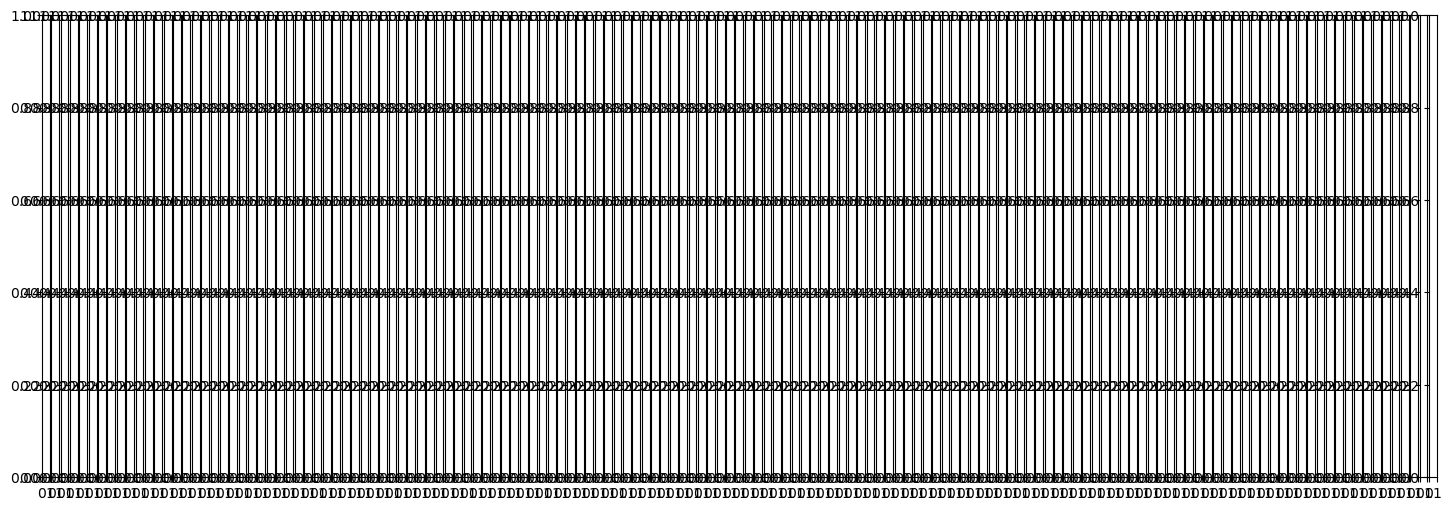

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=len(merged), figsize=(18, 6))

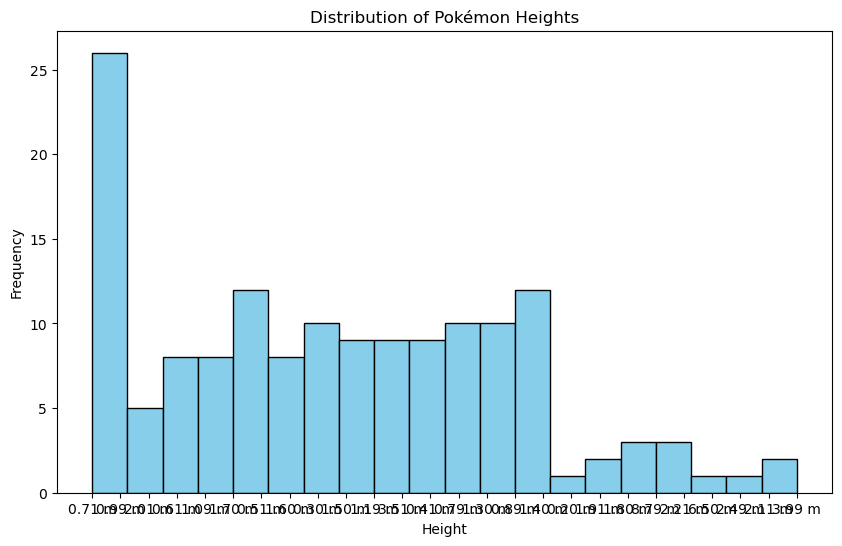

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(merged['height'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Pokémon Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [74]:
merged.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       '1st_Evolution', '2st_Evolution', '3st_Evolution', '2st_preEvolution',
       '1st_preEvolution', 'abilities', 'against_bug', 'against_dark',
       'against_dragon', 'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal', 'against_poison',
       'against_psychic', 'against_rock', 'against_steel', 'against_water',
       'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']

### Bar Plot for Pokémon Types Distribution:

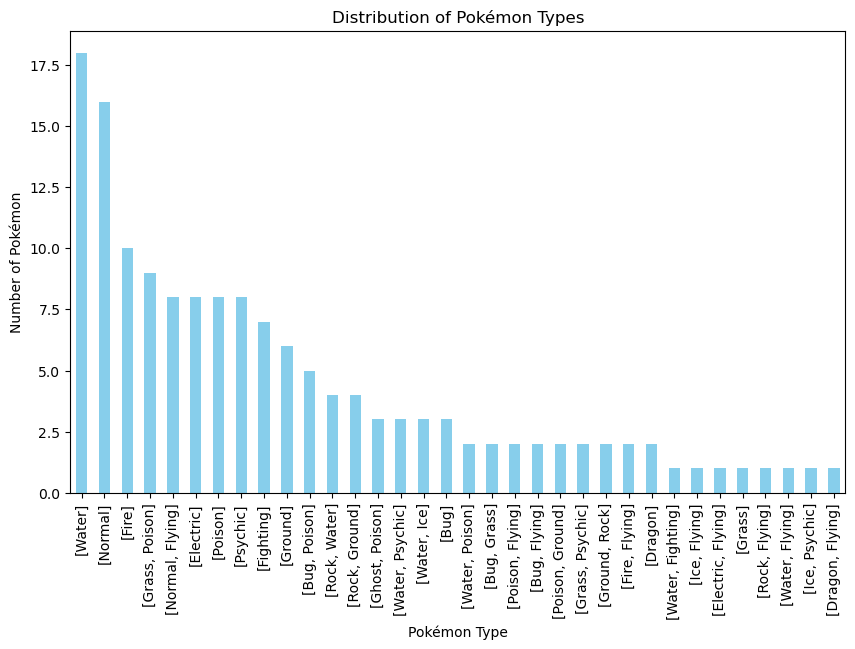

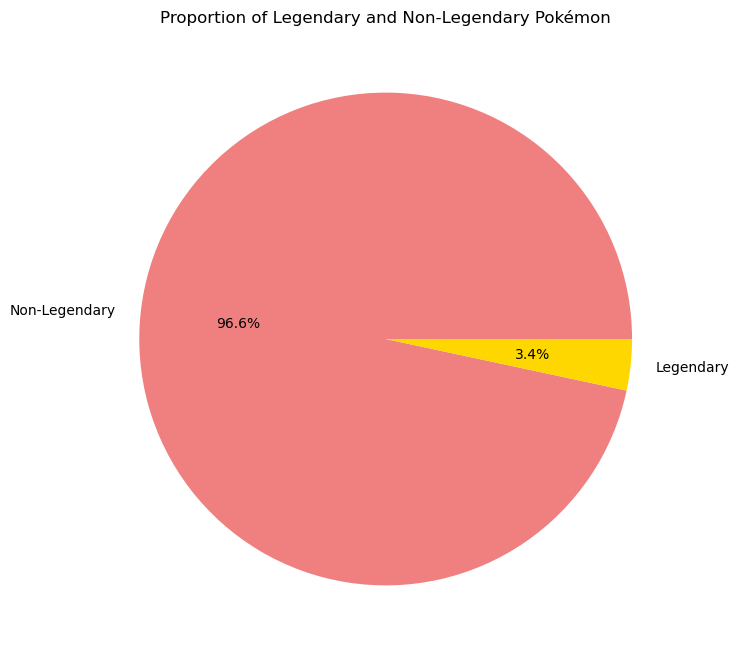

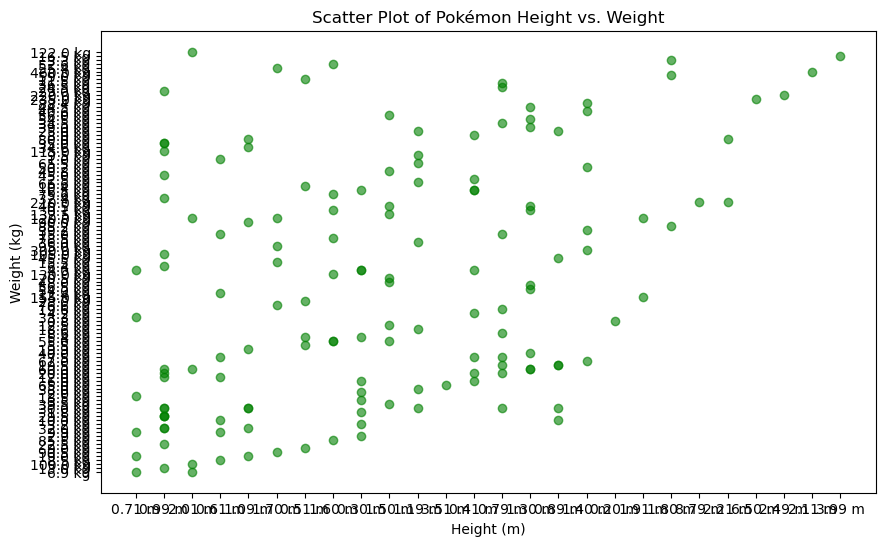

TypeError: unhashable type: 'list'

<Figure size 1200x800 with 0 Axes>

In [79]:


type_counts = merged['type'].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pokémon Types')
plt.xlabel('Pokémon Type')
plt.ylabel('Number of Pokémon')
plt.show()


legendary_counts = merged['is_legendary'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(legendary_counts, labels=['Non-Legendary', 'Legendary'], autopct='%1.1f%%', colors=['lightcoral', 'gold'])
plt.title('Proportion of Legendary and Non-Legendary Pokémon')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(merged['height'], merged['weight'], color='green', alpha=0.6)
plt.title('Scatter Plot of Pokémon Height vs. Weight')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='attack', data=merged, palette='viridis')
plt.title('Box Plot of Pokémon Attack Stats by Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Attack Stat')
plt.xticks(rotation=45)
plt.show()


# pie chat :

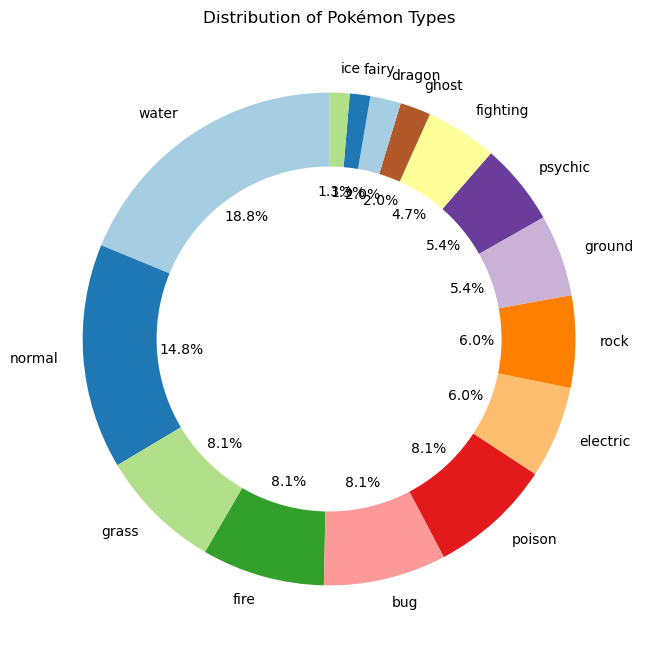

In [81]:



type_counts = merged['type1'].value_counts()

plt.figure(figsize=(8, 8))



plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Distribution of Pokémon Types')
plt.show()


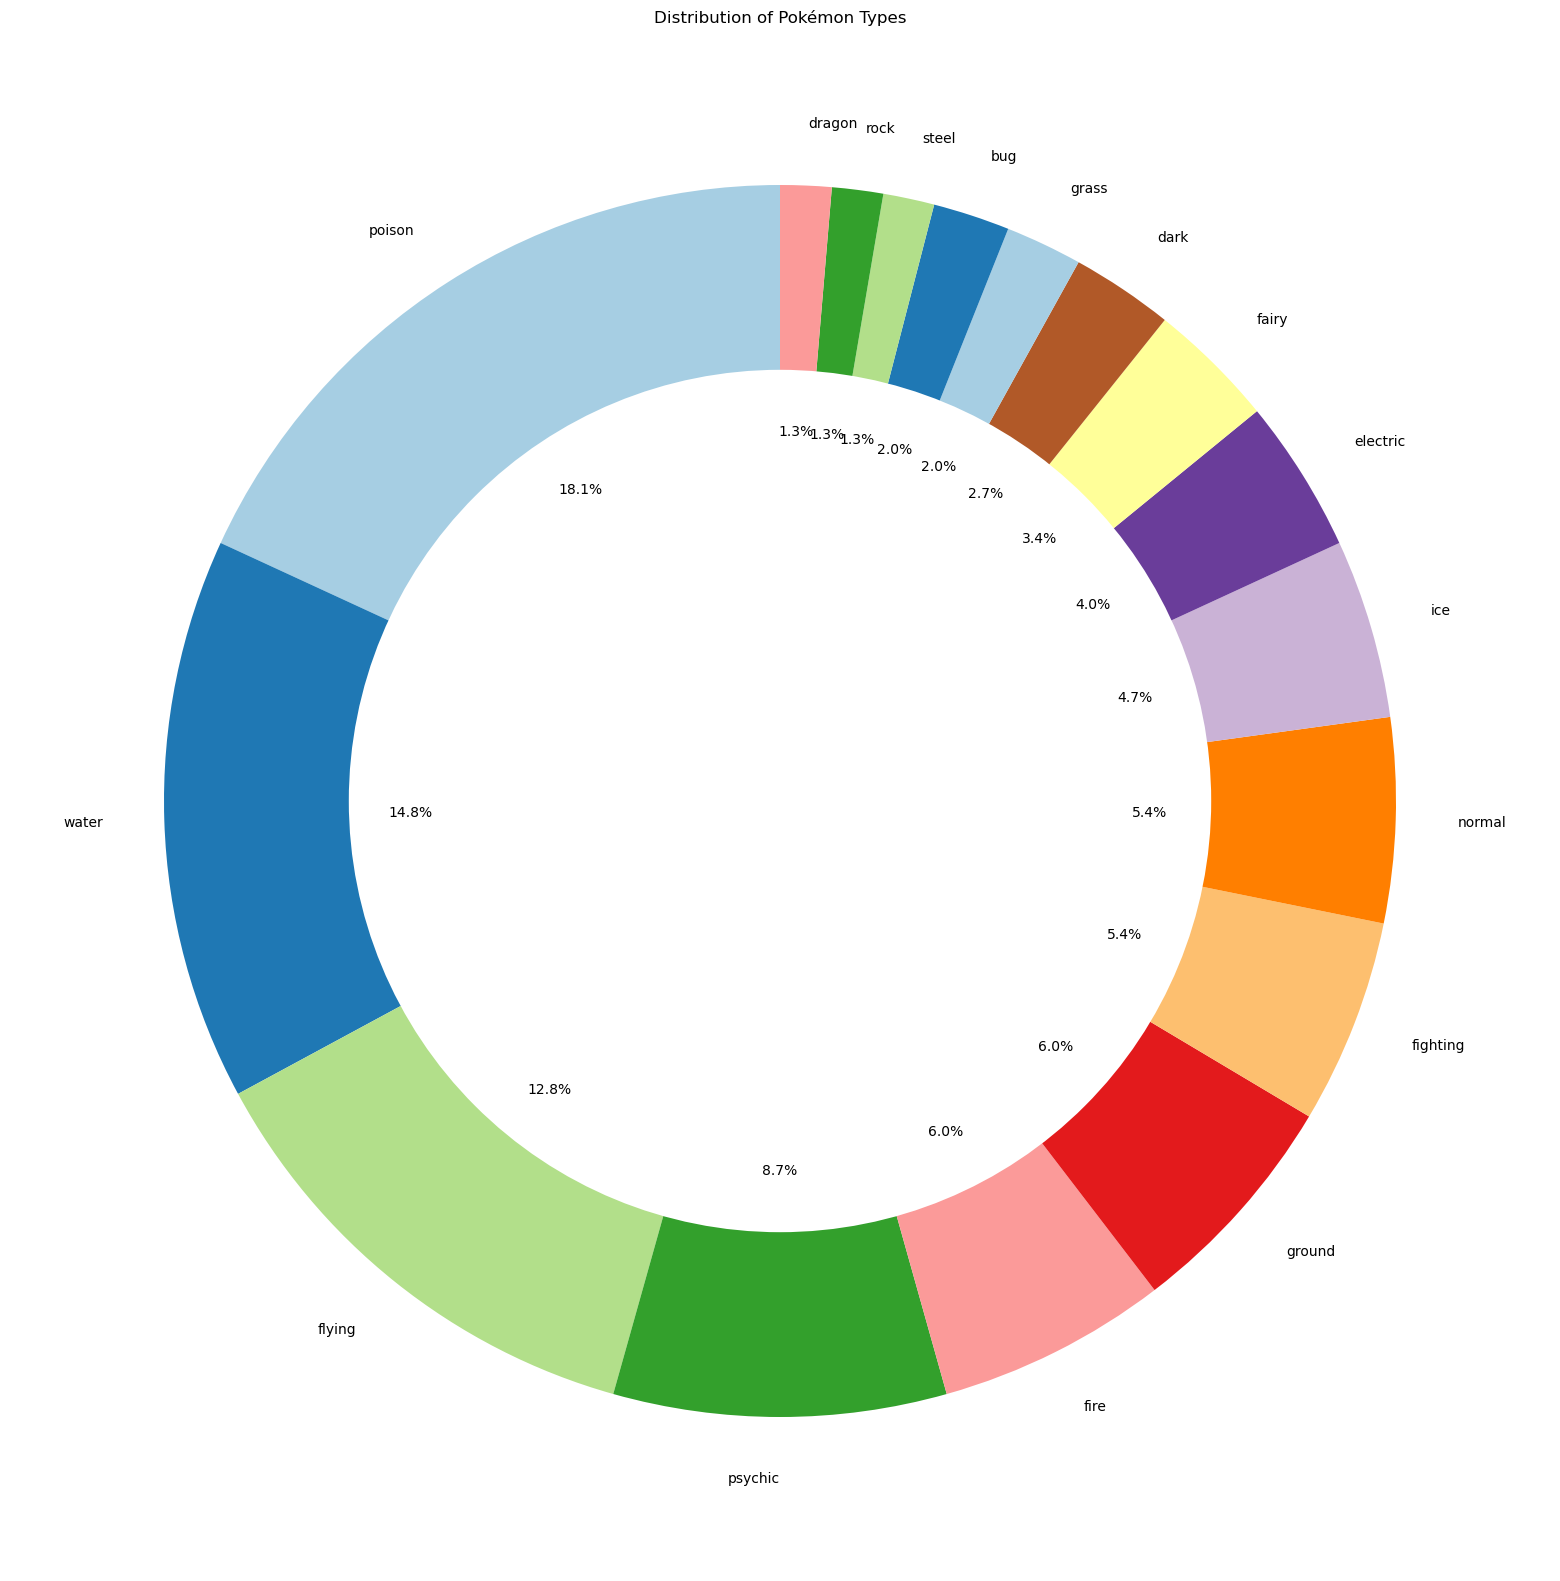

In [78]:

type_counts = merged['type2'].value_counts()

plt.figure(figsize=(20, 20))


plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Distribution of Pokémon Types')
plt.show()


In [91]:
merged

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,88.1,4,60,50,65,fire,fire,8.5,1,0
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,88.1,5,80,65,80,fire,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,50.0,147,50,50,50,dragon,dragon,3.3,1,0
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,50.0,148,70,70,70,dragon,dragon,16.5,1,0
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,50.0,149,100,100,80,dragon,flying,210.0,1,0
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,NaN,150,194,120,140,psychic,psychic,122.0,1,1


# tree map:Description: While not a traditional geographical map, a treemap visualizes hierarchical data as nested rectangles, often representing categories and subcategories.
# Use Cases: It is useful for displaying hierarchical structures in a compact and organized manner.

In [102]:
df_cleaned = merged.dropna(subset=['type2'])
type2_counts = df_cleaned['type2'].value_counts().reset_index()
type2_counts.columns = ['Type2', 'Count']
fig = px.treemap(type2_counts, path=['Type2'], values='Count', title='Treemap of Pokémon Types (Type 2)')
fig.show()

#  HEAT MAP:
# Description: A heat map represents data values in a matrix format where colors indicate the magnitude of values.
# Use Cases: Heat maps are useful for visualizing patterns in large datasets, such as website user activity, stock market movements, or temperature variations.

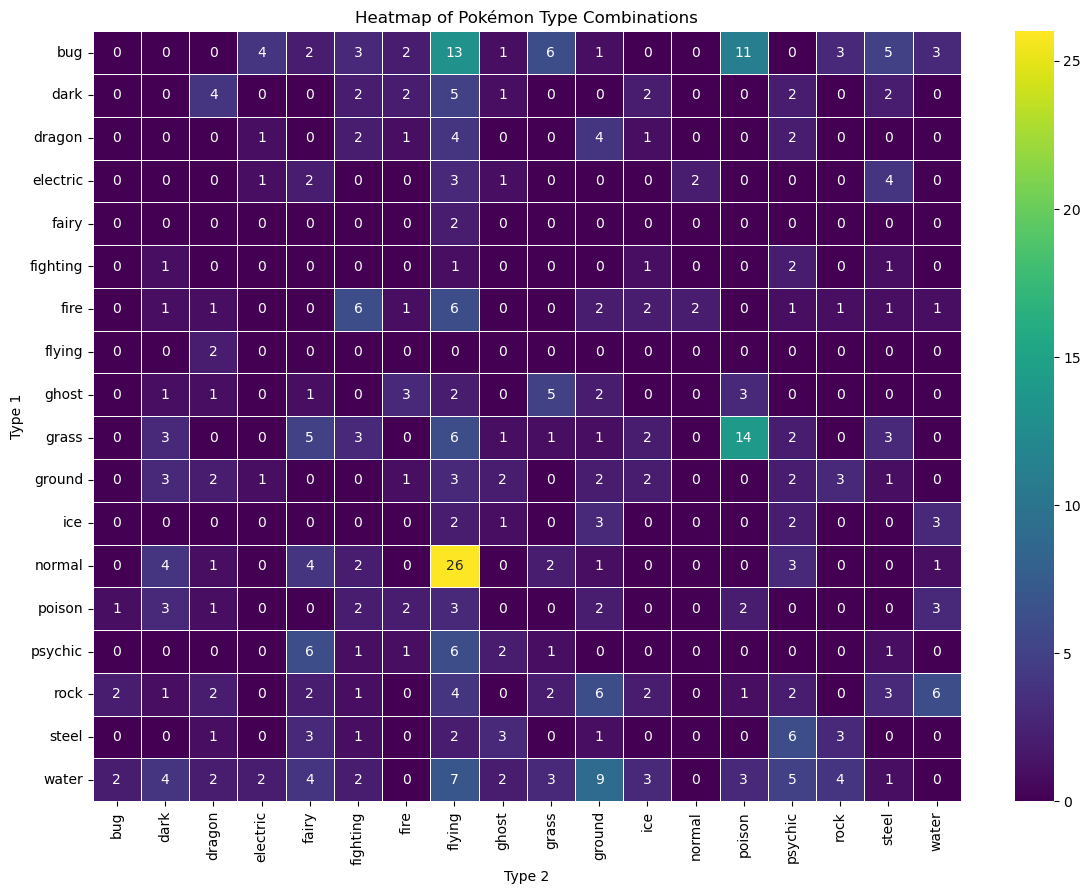

In [101]:
mn = merged.dropna(subset=['type1', 'type2'])
type_counts = pd.crosstab(df_cleaned['type1'], df_cleaned['type2'])
plt.figure(figsize=(14, 10))
sns.heatmap(type_counts, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Pokémon Type Combinations')
plt.xlabel('Type 2')
plt.ylabel('Type 1')
plt.show()


# Bubble map: Description: A bubble map places bubbles or circles on a map, with the size of each bubble representing a quantitative variable.
 # Use Cases: It is effective for displaying spatial distributions of values, especially when locations have additional information to convey.

In [108]:
merged_cleaned = merged.dropna(subset=['height', 'weight'])
merged_cleaned['height'] = pd.to_numeric(merged_cleaned['height'].str.replace(' m', ''))
merged_cleaned['weight'] = pd.to_numeric(merged_cleaned['weight'].str.replace(' kg', ''))

fig = px.scatter_geo(merged_cleaned,
                     lat=[0] * len(merged_cleaned),
                     lon=[0] * len(merged_cleaned),
                     size='height',
                     color='weight',
                     hover_name='name',
                     projection='natural earth',
                     title='Bubble Map of Pokémon Height and Weight')

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))
fig.update_geos(projection_type='natural earth')
fig.show()




In [110]:
import plotly.graph_objects as go

# Flow map: Description: A flow map illustrates the movement of objects, people, or information from one location to another.
# Use Cases: It is commonly used to show migration patterns, trade routes, or the flow of goods and services.

In [111]:
merged_cleaned = merged.dropna(subset=['type1', 'type2'])
flow_df = merged_cleaned.groupby(['type1', 'type2']).size().reset_index(name='count')
ig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=list(set(flow_df['type1'].tolist() + flow_df['type2'].tolist()))
    ),
    link=dict(
        source=flow_df['type1'].map(lambda x: flow_df['type1'].unique().tolist().index(x)),
        target=flow_df['type2'].map(lambda x: flow_df['type2'].unique().tolist().index(x)),
        value=flow_df['count']
    )
)])
fig.update_layout(title_text="Flow Map of Pokémon Types")
fig.show()

# Connection Map:Description: A connection map visualizes relationships between different locations or entities using lines or arrows.
# Use Cases: It is useful for displaying networks, such as social connections, transportation routes, or communication links.

In [113]:
import networkx as nx

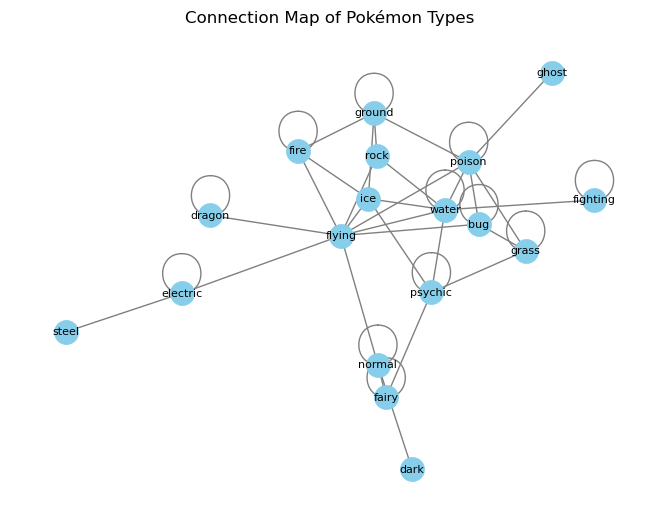

In [114]:
merged_cleaned = merged.dropna(subset=['type1', 'type2'])
G = nx.Graph()
edges = [(row['type1'], row['type2']) for index, row in merged_cleaned.iterrows()]
G.add_edges_from(edges)
pos = nx.spring_layout(G)  # You can use other layout algorithms as well
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', linewidths=0.5)
plt.title('Connection Map of Pokémon Types')
plt.show()